In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from natsort import natsorted, ns
%matplotlib inline

In [2]:
results = dict()

with open('/home/felipe/queirozfcom/files/stackoverflow-data-explorer-count-by-tag-2016-2017-taken-on-2017-10-26.txt','r') as f:
    for line in f:
                
        tag,count,yearmonth =line.split()
        
        tag = tag.strip()
        count = count.strip()
        yearmonth = yearmonth.strip()

        # pad numbers
        yearmonth = re.sub(r'^(\d{4})-(\d{1})$',r'\1-0\2',yearmonth)
        
        if yearmonth=='2017-10':
            continue
            # month has not ended 
        
        if results.get(tag,None) is None:
            results[tag] = [(yearmonth,int(count) )]
        else:
            results[tag] = results[tag] + [(yearmonth, int(count) )]            

In [3]:
results['pymc']

[('2016-01', 3),
 ('2016-10', 7),
 ('2016-11', 8),
 ('2016-12', 6),
 ('2016-02', 4),
 ('2016-03', 5),
 ('2016-04', 2),
 ('2016-05', 8),
 ('2016-06', 2),
 ('2016-07', 2),
 ('2016-08', 4),
 ('2016-09', 6),
 ('2017-01', 6),
 ('2017-02', 6),
 ('2017-03', 2),
 ('2017-04', 9),
 ('2017-05', 8),
 ('2017-06', 4),
 ('2017-07', 7),
 ('2017-08', 5),
 ('2017-09', 9)]

In [4]:
periods = ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06',
           '2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
           '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06',
           '2017-07','2017-08','2017-09']

In [5]:
list(results.keys())

['numpy',
 'pymc',
 'scrapy',
 'statsmodels',
 'beautifulsoup',
 'mxnet',
 'tensorflow',
 'seaborn',
 'theano',
 'opencv',
 'spacy',
 'networkx',
 'matplotlib',
 'pymc3',
 'nltk',
 'scikit-learn',
 'bokeh',
 'pytorch',
 'keras',
 'scipy',
 'pandas',
 'cntk',
 'gensim']

In [6]:
for key in list(results.keys()):
    existing_dates = [pair[0] for pair in results[key]]
    
    missing = set(periods) - set(existing_dates)
    
    for period in missing:
        results[key] = results[key] + [(period,0)]   

In [7]:
with open('/home/felipe/queirozfcom/files/crossvalidated-data-explorer-count-by-tag-2016-2017-taken-on-2017-10-26.txt','r') as f:
    for line in f:
                
        tag,count,yearmonth =line.split()

        tag = tag.strip()
        count = count.strip()
        yearmonth = yearmonth.strip()
        
        # pad numbers
        yearmonth = re.sub(r'^(\d{4})-(\d{1})$',r'\1-0\2',yearmonth)
        
        if yearmonth=='2017-10':
            continue
            # month has not ended 
        
        current_counts_for_this_tag = results[tag]
        
        current_pair = [(date,cnt) for date,cnt in current_counts_for_this_tag if date == yearmonth][0]
                          
        _,current_count = current_pair
                    
        new_count = current_count + int(count)
        
        current_counts_for_this_tag.remove(current_pair)
        
                
        new_pair = (yearmonth,new_count)
        
        current_counts_for_this_tag.append(new_pair)
                                    
        results[tag] = current_counts_for_this_tag       
        
        break

In [8]:
# merge pymc and pymc3
pymc = results['pymc3']
pymc

[('2016-01', 6),
 ('2016-10', 5),
 ('2016-11', 13),
 ('2016-12', 9),
 ('2016-02', 6),
 ('2016-03', 7),
 ('2016-04', 1),
 ('2016-05', 8),
 ('2016-06', 5),
 ('2016-07', 9),
 ('2016-08', 7),
 ('2016-09', 11),
 ('2017-01', 12),
 ('2017-02', 17),
 ('2017-03', 14),
 ('2017-04', 19),
 ('2017-05', 20),
 ('2017-06', 10),
 ('2017-07', 8),
 ('2017-08', 20),
 ('2017-09', 11)]

In [9]:
new_pairs = []

for (date,count) in results['pymc3']:
    
    count_pymc = [pair[1] for pair in pymc if pair[0]==date]
    
    if count_pymc:
        new_count = count + count_pymc[0]
    else:
        new_count = count
          
    new_pairs.append((date,new_count))
    
new_pairs

[('2016-01', 12),
 ('2016-10', 10),
 ('2016-11', 26),
 ('2016-12', 18),
 ('2016-02', 12),
 ('2016-03', 14),
 ('2016-04', 2),
 ('2016-05', 16),
 ('2016-06', 10),
 ('2016-07', 18),
 ('2016-08', 14),
 ('2016-09', 22),
 ('2017-01', 24),
 ('2017-02', 34),
 ('2017-03', 28),
 ('2017-04', 38),
 ('2017-05', 40),
 ('2017-06', 20),
 ('2017-07', 16),
 ('2017-08', 40),
 ('2017-09', 22)]

In [10]:
results.pop('pymc3',None)
results.pop('pymc',None)

results['pymc/pymc3'] = new_pairs

In [11]:
for key in list(results.keys()):
    existing_values = [pair[0] for pair in results[key]]
    
    missing = set(periods) - set(existing_values)
    
    for period in missing:
        results[key] = results[key] + [(period,0)]   

In [12]:
for key in list(results.keys()):
    
    results[key] = natsorted(results[key],key=lambda pair: pair[0])

In [13]:
results

{'beautifulsoup': [('2016-01', 150),
  ('2016-02', 183),
  ('2016-03', 178),
  ('2016-04', 165),
  ('2016-05', 176),
  ('2016-06', 184),
  ('2016-07', 185),
  ('2016-08', 171),
  ('2016-09', 151),
  ('2016-10', 195),
  ('2016-11', 189),
  ('2016-12', 233),
  ('2017-01', 250),
  ('2017-02', 243),
  ('2017-03', 261),
  ('2017-04', 232),
  ('2017-05', 249),
  ('2017-06', 269),
  ('2017-07', 285),
  ('2017-08', 262),
  ('2017-09', 254)],
 'bokeh': [('2016-01', 32),
  ('2016-02', 22),
  ('2016-03', 35),
  ('2016-04', 35),
  ('2016-05', 47),
  ('2016-06', 39),
  ('2016-07', 39),
  ('2016-08', 53),
  ('2016-09', 51),
  ('2016-10', 34),
  ('2016-11', 47),
  ('2016-12', 51),
  ('2017-01', 83),
  ('2017-02', 82),
  ('2017-03', 71),
  ('2017-04', 69),
  ('2017-05', 79),
  ('2017-06', 73),
  ('2017-07', 78),
  ('2017-08', 57),
  ('2017-09', 76)],
 'cntk': [('2016-01', 0),
  ('2016-02', 3),
  ('2016-03', 0),
  ('2016-04', 2),
  ('2016-05', 5),
  ('2016-06', 1),
  ('2016-07', 1),
  ('2016-08', 0),
 

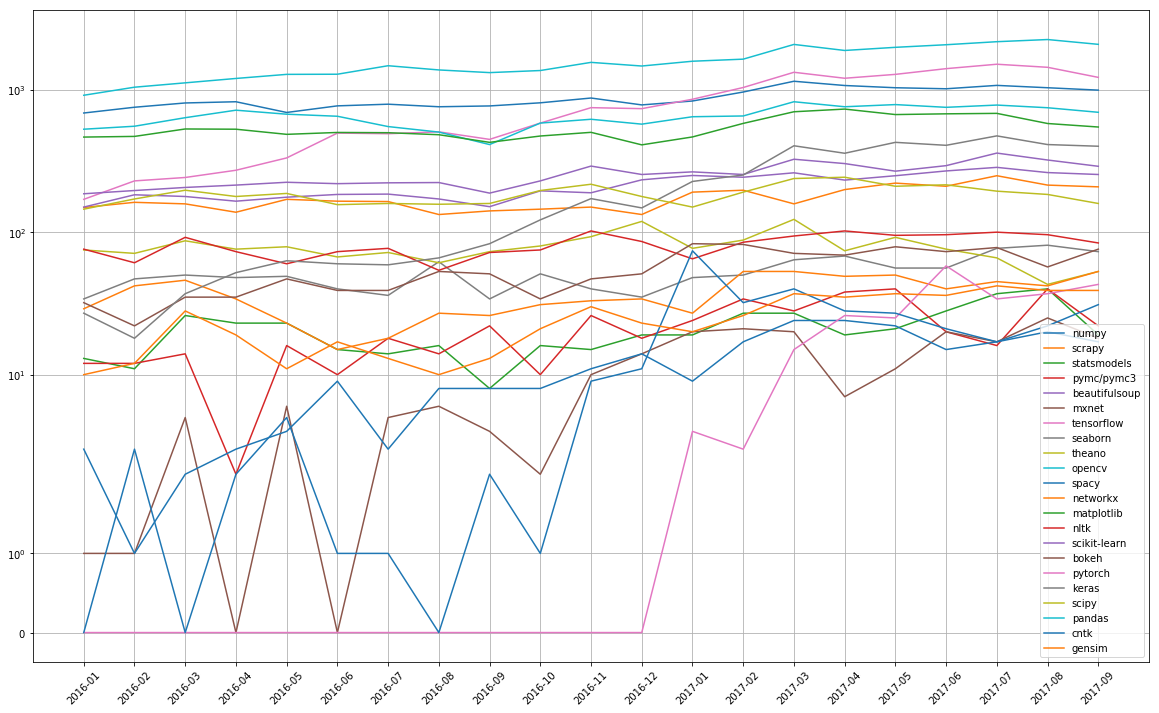

In [17]:
plt.clf()

img = plt.gcf()

ax = plt.gca()
for key in list(results.keys()):
    x = periods
    y = [pair[1] for pair in results[key]]
    plt.plot(np.array(x),np.array(y),label=key)
    plt.xticks(rotation=45)
    
plt.legend(loc='lower right')
plt.grid(True)

plt.yscale('symlog')


img.set_size_inches(20,12)